# Creating the model 

### Dataset

In [1]:
import torch 
import torchvision

from torchvision import transforms, datasets

train = datasets.MNIST( "", 
                        train = True, 
                        download=True, 
                        transform=transforms.Compose(
                            [transforms.ToTensor()]
                                                    )
                      )

test = datasets.MNIST( "", 
                        train = False, 
                        download=True, 
                        transform=transforms.Compose(
                            [transforms.ToTensor()]
                                                    )
                      )

# batches : How many samples at a time will be processed
# shuffle : Miw the data in each batch 
#           (in order to avoid only one label type in the batch)
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = 10)
testset  = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = 10)

### NN as a class

In [25]:
# Object Oriented Library
import torch.nn as nn 

# Functions Library 
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        # Parent class init
        super().__init__()
        # Fully connected layers
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1) 
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


## Training

In [31]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 1e-3)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of features and labels
        X, y = data
        # before passing data through the net
        net.zero_grad() # set grad to zero

        # feedforward
        output = net(X.view(-1,28*28))

        # loss
        loss = F.nll_loss(output, y)

        # backforward
        loss.backward()

        # update weigths
        optimizer.step()
    print(loss)
        

tensor(0.0312, grad_fn=<NllLossBackward0>)
tensor(0.5430, grad_fn=<NllLossBackward0>)
tensor(0.0232, grad_fn=<NllLossBackward0>)


## Evaluation in test dataset

In [32]:
correct = 0 
total = 0 

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.965


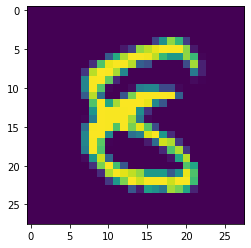

In [19]:
import matplotlib.pyplot as plt

img_sample = X[9]

plt.imshow(img_sample.view(28,28))
plt.show()

In [20]:
print(torch.argmax(net(img_sample.view(-1,784))[0]))

tensor(8)
